In [21]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib as M
from numpy.matlib import rand,zeros,ones,empty,eye
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
np.set_printoptions(precision=3)

#%matplotlib inline
plt.style.use('ggplot')

In [13]:
os.getcwd()

'/Users/Spencer/Projects/site-analysis'

### Importing Data

In [2]:
site_list = ['Saginaw Malleable','Pontiac North Industrial','Linden Road','Bay City Powertrain','Coldwater Road','Davison Road','Greenpoint','Hemphill','Saginaw Malleable Peninsula','Van Buren','Buick City','Flint West (Kettering)','Danville','Allison Gas Turbine','Framingham','Massena','Salina', 'Tonawanda','Elyria','Toledo']

results = np.load('results.npy')

N=100 # number of simulations is N-1, referred to as N

# Import weights, use as np.dot(A,wgts)
eyes = eye((11)).A
arr = np.array([20., 16., 15., 15., 8., 5., 5., 5., 4., 4., 3.])/100
wgts = eyes*arr

# 1 Incentives, 2 Permitting, 3 Substation, 4 Environmental, 5 Proximity to Partners,
# 6 Weather, 7 Access, 8 Solar Radiation, 9 Land Stabillity

### Analysis

In [3]:
# Analysis setting all (1) Incentives, (2) Permitting, (3) Substation, and (4) Environmental Equal

#### Use for BaseCase

/Users/Spencer/Distributions_et_al/anaconda/envs/pandahacks/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


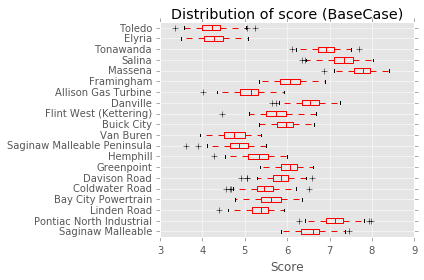

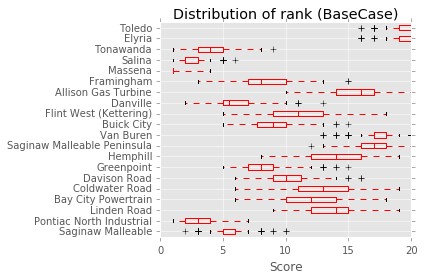

In [29]:
qualifier = 'BaseCase'
t2 = '$N=100$, $\sigma = 1$'
def plot_res(_type, _qualifiertext, _arr, _n, _wgts, _site_list):
    # _type is 'score' or 'rank'
    score_list = []
    
    if _type == 'score':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]))
    if _type == 'rank':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]).rank(ascending=False))
            
    scores = pd.DataFrame(score_list)

    # Plot as 10 historgrams of distribution of scores
    bp = scores.boxplot(vert=0, sym='red')
    plt.setp(bp['boxes'], color='red')
    plt.setp(bp['whiskers'],color='red')
    plt.setp(bp['fliers'],color='red')
    plt.tight_layout()
    plt.xlabel('Score')
    plt.title('Distribution of ' + _type + ' (' + _qualifiertext + ')')
    plt.savefig(r'results/' + _qualifiertext + r'_' + _type + '.png', transparent=True, dpi=1000)
    plt.show()
    
    return scores

basescores = plot_res('score', qualifier, results, N, wgts, site_list)
baseranks = plot_res('rank', qualifier, results, N, wgts, site_list)


## Incentives

In [17]:
# Set all of the (20, c1, 101) to "5" .. or 0 .. or 10?
results_inc = np.copy(results)
results_inc[:,0,:]=5
qualifier = 'Incentives'

#### Permitting

In [16]:
# Set all of the (20, c1, 101) to "5" .. or 0 .. or 10?
results_per = np.copy(results)
results_per[:,1,:]=5
qualifier = 'Permitting'

#### Substation

In [18]:
# Set all of the (20, c1, 101) to "5" .. or 0 .. or 10?
results_per = np.copy(results)
results_per[:,2,:]=5
qualifier = 'Substation'

#### Evironmental

In [10]:
# Set all of the (20, c1, 101) to "5" .. or 0 .. or 10?
results_per = np.copy(results)
results_per[:,3,:]=5
qualifier = 'Environmental'

/Users/Spencer/Distributions_et_al/anaconda/envs/pandahacks/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


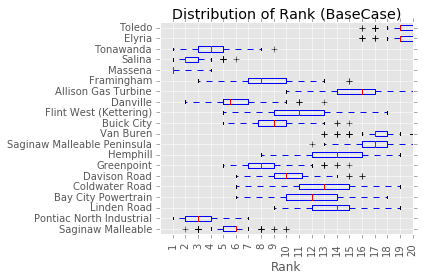

/Users/Spencer/Distributions_et_al/anaconda/envs/pandahacks/lib/python2.7/site-packages/ipykernel/__main__.py:26: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


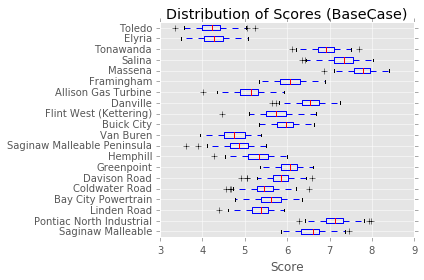

In [23]:

def plot_res(_type, _qualifiertext, _arr, _n, _wgts, _site_list):
    # _type is 'score' or 'rank'
    score_list = []
    
    if _type == 'score':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]))
    if _type == 'rank':
        for i in range(0, _n):
            score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]).rank(ascending=False))
            
    scores = pd.DataFrame(score_list)

    # Plot as 10 historgrams of distribution of scores
    bp = scores.boxplot(vert=0)
    plt.setp(bp['boxes'], color='blue')
    plt.setp(bp['whiskers'],color='blue')
    plt.setp(bp['fliers'],color='blue')
    plt.tight_layout()
    plt.xlabel('Score')
    plt.title('Distribution of ' + _type + ' (' + _qualifiertext + ')')
    plt.savefig(r'results/' + _qualifiertext + r'_' + _type + '.png', transparent=True, dpi=1000)
    plt.show()
    
    return scores

scores = plot_res('score', qualifier, results, N, wgts, site_list)
ranks = plot_res('rank', qualifier, results, N, wgts, site_list)
    


In [ ]:
# Need to plot difference, two boxplots on one?



In [33]:
scores

,Saginaw Malleable,Pontiac North Industrial,Linden Road,Bay City Powertrain,Coldwater Road,Davison Road,Greenpoint,Hemphill,Saginaw Malleable Peninsula,Van Buren,Buick City,Flint West (Kettering),Danville,Allison Gas Turbine,Framingham,Massena,Salina,Tonawanda,Elyria,Toledo
0,6.860000,7.340000,5.690000,5.820000,5.650000,6.070000,6.390000,5.630000,4.950000,4.930000,6.260000,5.990000,6.520000,5.500000,5.890000,7.100000,6.570000,6.220000,4.850000,4.850000
1,6.581385,7.312939,4.949767,5.992468,5.739275,5.880271,5.988463,5.635964,4.666384,4.767898,6.580260,5.612813,6.921165,5.250305,6.297841,6.783763,6.948755,6.026932,5.180627,4.852892
2,6.384531,7.225792,5.710649,5.238766,5.506509,6.637154,6.529392,4.964210,5.410219,4.843762,6.401653,6.006717,6.812344,5.209428,6.109800,7.043314,6.860262,6.626017,5.054389,4.605004
3,6.655084,7.018999,6.042904,5.878639,5.629932,5.947185,6.265579,5.424584,5.375878,5.315159,5.592561,6.195658,6.441019,5.477416,5.521748,6.628911,6.780471,6.651550,4.688211,5.003557
4,6.422573,7.613785,5.666992,5.930822,5.441060,6.424889,5.967977,5.966357,5.224266,4.617181,6.402144,6.021016,6.417161,5.826322,5.542938,6.869818,6.340138,6.146476,4.492248,4.584639
5,6.844508,7.014158,5.510501,5.885235,5.973034,6.004635,6.253649,4.983585,5.015812,5.068348,6.275463,6.328954,6.839910,5.717648,5.979332,7.104679,6.417059,6.257838,4.890730,4.872309
6,6.669171,7.213149,5.966730,5.075768,5.547123,5.775999,5.977745,5.597148,5.079148,4.819002,5.878295,5.616235,6.614795,5.683694,5.927729,7.226104,6.216227,6.020267,4.742360,5.503404
7,7.131357,7.743537,5.520553,5.739670,5.255135,5.480156,5.837074,5.148414,5.110147,4.801114,6.469812,6.389402,6.193802,5.508275,5.891358,6.907296,6.215487,6.097536,5.665783,5.286908
8,6.562579,7.700508,5.476793,5.854176,5.960444,6.034162,5.966562,5.841752,4.989143,5.008841,6.021173,5.893178,6.668570,5.690644,5.917054,7.369320,6.625510,5.668617,5.075426,4.363353
9,6.358621,7.263756,5.496242,5.384510,5.749040,5.712391,6.545077,5.658190,5.210751,4.468334,5.925621,6.225448,6.472805,5.569337,5.798906,7.165667,6.711823,5.629521,5.193419,4.737223


In [34]:

basescores

,Saginaw Malleable,Pontiac North Industrial,Linden Road,Bay City Powertrain,Coldwater Road,Davison Road,Greenpoint,Hemphill,Saginaw Malleable Peninsula,Van Buren,Buick City,Flint West (Kettering),Danville,Allison Gas Turbine,Framingham,Massena,Salina,Tonawanda,Elyria,Toledo
0,6.660000,7.140000,5.490000,5.620000,5.450000,5.870000,6.190000,5.430000,4.750000,4.730000,6.060000,5.790000,6.520000,5.100000,6.090000,7.900000,7.370000,7.020000,4.250000,4.250000
1,5.929149,7.226477,4.401593,5.959777,5.594735,5.726252,5.706869,5.629669,4.233254,4.413560,5.821786,5.529697,7.139867,4.906147,6.449947,7.770060,7.948755,6.789572,4.598291,4.290029
2,6.202940,6.874898,5.632922,5.401082,5.454525,6.592265,6.091581,4.799724,5.270263,4.570569,6.394360,5.608377,6.604076,4.686821,6.272299,7.977680,7.538191,7.418112,4.530793,3.973772
3,6.680544,7.135134,5.815904,5.637211,5.303858,5.768348,5.859767,5.518959,5.001469,5.056746,5.559811,5.936559,6.258046,4.762133,5.723728,7.598718,7.701113,7.435317,3.869862,4.322120
4,6.159159,7.719321,5.346272,5.750940,5.436545,6.063087,5.767366,5.814614,5.088221,4.062445,6.252801,5.892357,6.563831,5.399506,5.503716,7.869818,7.025728,7.146476,3.819285,3.768497
5,6.705504,6.753525,5.504902,5.843256,5.668624,5.845219,6.047976,4.271573,4.930783,5.281586,5.850172,5.796374,6.731069,5.174951,6.169490,7.907576,7.358063,7.042719,4.217391,4.269052
6,6.615450,6.912001,5.700381,4.771836,5.719167,5.676167,5.935325,5.541099,4.795673,4.143594,5.934989,5.920008,6.745233,5.328755,6.336189,7.918988,6.883514,6.825482,4.402037,5.051913
7,7.298328,7.917024,5.147076,5.628900,5.070602,4.907043,5.455894,5.038269,4.874122,4.668610,6.507078,6.153145,6.050081,5.231058,6.091403,7.775739,7.122185,6.938364,4.742282,4.660759
8,6.333559,7.276112,5.264677,5.610062,5.656105,5.524555,5.470203,6.004875,4.634194,4.674992,5.905035,5.824870,6.527513,5.619867,6.099458,8.155538,7.283306,6.491307,4.593543,3.633376
9,6.043387,7.394893,5.225753,5.354794,5.623282,5.817709,6.384543,5.612689,5.173575,4.319906,5.665965,6.280938,6.525918,5.331277,5.822058,8.165667,7.188409,6.518182,4.454423,4.214538


In [6]:
# Hierarchical index 0 is Base, 1 is Uniform on One Variable
df_ranks = pd.concat([baseranks, ranks], keys=[i for i in range(0,100)])
df_ranks.index = df_ranks.index.set_levels([['Original','Uniform Incentives'],[i for i in range(0,100)]])
df_ranks = df_ranks.unstack(0); df_ranks

NameError: name 'baseranks' is not defined

/home/spencer/Apps/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


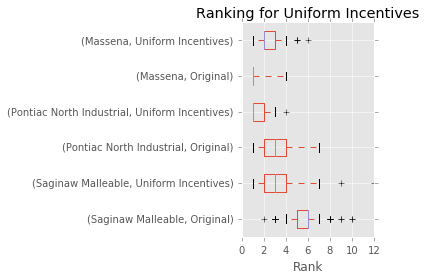

In [126]:
# Plotting Saginaw, Pontiac North, and Massena
df_ranks[['Saginaw Malleable','Pontiac North Industrial','Massena']].boxplot(vert=0)
plt.title('Ranking for Uniform Incentives')
plt.xlabel('Rank')
plt.tight_layout()
plt.savefig('Incentives_Plot1.pdf')
plt.show()

/home/spencer/Apps/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


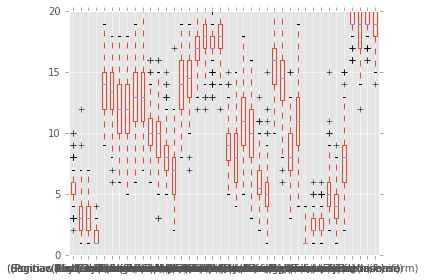

In [113]:
df_ranks.boxplot(); plt.show()